In [1]:
import pandas as pd


In [2]:
import pandas as pd
df_test = pd.read_csv("../data_clean/df_test.csv")
df_control = pd.read_csv("../data_clean/df_control.csv")

In [3]:
df_test.isna().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation            0
clnt_tenure_yr      58
clnt_tenure_mnth    58
clnt_age            58
gendr               58
num_accts           58
bal                 58
calls_6_mnth        58
logons_6_mnth       58
dtype: int64

In [4]:
df_control.isna().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation            0
clnt_tenure_yr      42
clnt_tenure_mnth    42
clnt_age            54
gendr               42
num_accts           42
bal                 42
calls_6_mnth        42
logons_6_mnth       42
dtype: int64

In [5]:
#df_test

In [6]:
df_test.nunique()

client_id            26968
visitor_id           29919
visit_id             37136
process_step             5
date_time           164138
Variation                1
clnt_tenure_yr          49
clnt_tenure_mnth       444
clnt_age               157
gendr                    4
num_accts                7
bal                  26907
calls_6_mnth             7
logons_6_mnth            7
dtype: int64

In [7]:
df_test["process_step"].value_counts()

process_step
start      55773
step_1     38666
step_2     30899
step_3     25761
confirm    25600
Name: count, dtype: int64

In [8]:
df_control["process_step"].value_counts()

process_step
start      45380
step_1     29544
step_2     25773
step_3     22503
confirm    17336
Name: count, dtype: int64

## H1 Which control or test clients exhibit higher average logons in the 6 months?

In [9]:
df_control.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [22]:
df_test['logons_6_mnth'].value_counts().sort_index()


logons_6_mnth
3.0    24172
4.0    26397
5.0    24007
6.0    20901
7.0    17216
8.0    16974
9.0    46974
Name: count, dtype: int64

In [10]:
comparison_logons = pd.DataFrame({
    'Test': df_test['logons_6_mnth'].agg(['mean', 'median']),
    'Control': df_control['logons_6_mnth'].agg(['mean', 'median'])})

comparison_logons

,Test,Control
mean,6.242124,6.303614
median,6.000000,6.000000


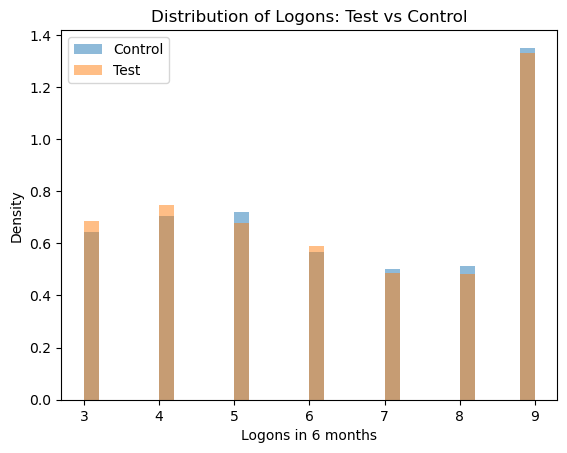

In [24]:
import matplotlib.pyplot as plt

plt.figure()

plt.hist(
    df_control['logons_6_mnth'].dropna(),
    bins=30,
    density=True,        
    alpha=0.5,    
    label='Control')

plt.hist(
    df_test['logons_6_mnth'].dropna(),
    bins=30,
    density=True,
    alpha=0.5,
    label='Test')

plt.xlabel('Logons in 6 months')
plt.ylabel('Density')
plt.title('Distribution of Logons: Test vs Control')
plt.legend()
plt.show()


## Results Interpretation
To evaluate H1, we calculated the mean and median number of logons over the last six months separately for the Test and Control groups.
The median logons are identical for both groups, indicating that typical client behavior is similar.
However, the Control group shows a slightly higher mean number of logons, driven by a small number of highly active users.
Overall, this suggests that there is no substantial increase in digital engagement for the Test group compared to the Control group.

## Hypotheses

H0 (Null Hypothesis):
There is no difference in the average number of logons over six months between Test and Control clients.

H1 (Alternative Hypothesis):
There is a difference in the average number of logons over six months between Test and Control clients.

## Statistical Test Selection

To compare the average number of logons between two independent groups (Test and Control), we apply an independent two-sample t-test.

This test is appropriate because:
1. the groups are independent
2. the variable is numerical
3. the sample sizes are very large
4. by the Central Limit Theorem, the sampling distribution of the mean can be approximated by a normal distribution.

In [11]:
from scipy.stats import ttest_ind

alpha = 0.05

logons_test = df_test['logons_6_mnth'].dropna()
logons_control = df_control['logons_6_mnth'].dropna()

t_stat, p_value = ttest_ind(logons_test,logons_control,equal_var=False)

t_stat, p_value

(np.float64(-7.897513740433276), np.float64(2.8546789502983325e-15))

In [12]:
if p_value < alpha:
    print("Reject H0: There is a statistically significant difference in logons.")
else:
    print("Fail to reject H0: There is no statistically significant difference in logons.")


Reject H0: There is a statistically significant difference in logons.


## Conclusion

The initial descriptive analysis suggested a small difference in the average number of logons between Test and Control clients, while median values appeared relatively similar.

After conducting a two-sample t-test at a 5% significance level, the resulting p-value (p ≈ 2.85 × 10⁻¹⁵) indicates that this difference is statistically significant.

Therefore, we reject the null hypothesis. The statistical test confirms that the observed difference in logon behavior between the two groups is unlikely to be due to random variation, supporting the conclusion that the Test and Control groups exhibit genuinely different levels of digital engagement.

However, statistical significance alone does not indicate whether this difference is meaningful in practice.  
This naturally leads to the following question:

**Is the observed difference in logons between Test and Control clients practically significant?**



## H2: Could Test or Control show reduced call center contacts over 6 months, suggesting better self-service?

In [11]:
comparison_calls = pd.DataFrame({
    'Test': df_test['calls_6_mnth'].agg(['mean', 'median']),
    'Control': df_control['calls_6_mnth'].agg(['mean', 'median'])})

comparison_calls

,Test,Control
mean,3.201986,3.267755
median,3.000000,3.000000


Before interpreting the results, we check the number of observations in the Test and Control groups.
This step ensures that both groups have sufficiently large sample sizes and that the comparison is reliable and not influenced by small-sample bias.

In [12]:
print("TEST count:", df_test['calls_6_mnth'].count())
print("CONTROL count:", df_control['calls_6_mnth'].count())

TEST count: 176641
CONTROL count: 140494


## Results Interpretation
To evaluate H2, we compared the mean and median number of call center contacts over the last six months for the Test and Control groups.
The median number of calls is the same for both groups, indicating similar typical behavior.
However, the Test group shows a slightly lower average number of call center contacts compared to the Control group.
This difference suggests that a subset of Control clients relies more heavily on call center support, while Test clients tend to use assisted support slightly less.
Overall, these results support the hypothesis that the Test group may benefit from improved self-service, leading to a modest reduction in call center usage.